In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [12]:
x = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y = [0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1]

X_test = [0, 1, 2, 3, 4, 5]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4014939232249575
            Iterations: 14
            Function evaluations: 14
            Gradient evaluations: 14


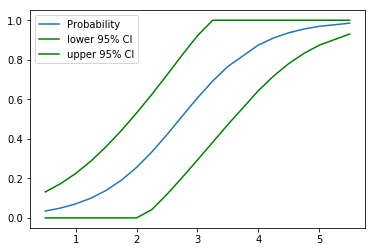

In [13]:
X = sm.add_constant(x)

logit = sm.Logit(y,X).fit_regularized()
proba = (logit.predict(X))

# estimate confidence interval for predicted probabilities
cov = logit.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x, proba, label ='Probability')
plt.plot(x, lower, color='g',label='lower 95% CI')
plt.plot(x, upper, color='g', label = 'upper 95% CI')
plt.legend()
plt.show()

In [14]:
#bootstrap
preds = []
for i in range(1000):
    boot_idx = np.random.choice(len(X), replace=True, size=len(X))
    print(boot_idx,type(boot_idx))
    Y=[]
    for x in boot_idx:
        Y.append(y[x])
    print(Y)
    try:
        model = sm.Logit(Y, X[boot_idx]).fit_regularized()
        sorted = np.sort(X[boot_idx],axis=0)
        print("SORTED",sorted)
        preds.append(logit.predict(sorted))
        print("SORTED PREDS", logit.predict(sorted))
    except:
        pass
    if i == 1:
        break

print(preds)

[13 18 17  3 13 18 16  3  6  5 13  0  4 18 17  0  0  1 19 12] <class 'numpy.ndarray'>
[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3322969740659524
            Iterations: 14
            Function evaluations: 15
            Gradient evaluations: 14
SORTED [[1.   0.5 ]
 [1.   0.5 ]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.25]
 [1.   1.25]
 [1.   1.5 ]
 [1.   1.75]
 [1.   1.75]
 [1.   3.25]
 [1.   3.5 ]
 [1.   3.5 ]
 [1.   3.5 ]
 [1.   4.5 ]
 [1.   4.75]
 [1.   4.75]
 [1.   5.  ]
 [1.   5.  ]
 [1.   5.  ]
 [1.   5.5 ]]
SORTED PREDS [0.03471075 0.03471075 0.03471075 0.04977352 0.10002968 0.10002968
 0.13934587 0.19083829 0.19083829 0.6926196  0.76648272 0.76648272
 0.76648272 0.93662425 0.95561112 0.95561112 0.96909735 0.96909735
 0.96909735 0.98519458]
[ 2 19  0 13 19 19  8  5  5 16  5 11  7 16  7  7 12  7  5 11] <class 'numpy.ndarray'>
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1

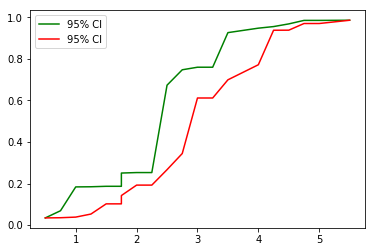

In [15]:
p = np.array(preds)
plt.plot(X[:, 1], np.percentile(p, 95.5, axis=0),color='g',label='95% CI')
plt.plot(X[:, 1], np.percentile(p, 2.5, axis=0),color='r',label='95% CI')
plt.legend()
plt.show()